In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv('credit.csv')

In [3]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',buy_radio_tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',buy_radio_tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',buy_furniture_equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously',buy_new_car,4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [4]:
from sklearn.preprocessing import LabelEncoder
np.unique(df['purpose'])

array(['business', 'buy_domestic_appliance', 'buy_furniture_equipment',
       'buy_new_car', 'buy_radio_tv', 'buy_used_car', 'education',
       'other', 'repairs', 'retraining'], dtype=object)

In [5]:
np.unique(LabelEncoder().fit_transform(df['purpose']))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
pd.get_dummies(df['purpose']).iloc[:5]

,business,buy_domestic_appliance,buy_furniture_equipment,buy_new_car,buy_radio_tv,buy_used_car,education,other,repairs,retraining
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [7]:
# instead of pd.fet_dummies(df['purpose'])
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
df['purpose'] = df['purpose'].apply( \
    lambda s: " ".join(s.split('_')), 0)
dummy_matrix = vec.fit_transform(df['purpose']).toarray()
pd.DataFrame(dummy_matrix, columns=vec.get_feature_names()).head()

,appliance,business,buy,car,domestic,education,equipment,furniture,new,other,radio,repairs,retraining,tv,used
0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


In [8]:
# Create numeric encoding for credit_history
credit_history_num = LabelEncoder().fit_transform(df['credit_history'])

In [9]:
#non_numeric_columns = [col for col, val in df.dtypes.items() if col != 'class' and val == 'O']
non_numeric_columns = [col for col, val in df.dtypes.items() if val == 'O']

from sklearn.preprocessing import LabelEncoder
for column in non_numeric_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

In [10]:
X = df.drop('class', axis=1)
y = df[['class']]

In [11]:
X_num = pd.concat([X, pd.Series(credit_history_num)], 1)

In [12]:
X_hot = pd.concat([X, pd.get_dummies(df['credit_history'])], 1)

# Compare the number of features of the resulting DataFrames
print(X_hot.shape[1], X_num.shape[1])

25 21


In [13]:
import numpy as np
n = len(df)
fakes = pd.DataFrame(np.random.uniform(low=0.0, high=1.0, size=n*100).reshape(X.shape[0], 100),
                    columns=['fake_' + str(j) for j in range(100)])
X_with_fakes = pd.concat([X, fakes], 1)

In [14]:
X_with_fakes

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,fake_90,fake_91,fake_92,fake_93,fake_94,fake_95,fake_96,fake_97,fake_98,fake_99
0,1,6,1,4,1169,4,3,4,3,2,...,0.098734,0.823665,0.421492,0.386734,0.908216,0.563910,0.790993,0.364867,0.769700,0.744846
1,0,48,3,4,5951,2,0,2,0,2,...,0.536398,0.546720,0.038572,0.616094,0.910291,0.817740,0.282872,0.411101,0.534839,0.654027
2,3,12,1,6,2096,2,1,2,3,2,...,0.095597,0.941848,0.494526,0.023945,0.600961,0.443275,0.311721,0.371596,0.514388,0.636503
3,1,42,3,2,7882,2,1,2,3,1,...,0.903169,0.548630,0.956938,0.781417,0.604332,0.877665,0.096769,0.299976,0.575058,0.494806
4,1,24,2,3,4870,2,0,3,3,2,...,0.624369,0.411297,0.336740,0.659538,0.284151,0.907424,0.486901,0.848153,0.416719,0.893616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,3,2,1736,2,1,3,0,2,...,0.014569,0.998540,0.399852,0.782081,0.774818,0.718631,0.084134,0.719554,0.563147,0.124902
996,1,30,3,5,3857,2,0,4,1,2,...,0.338958,0.402870,0.635803,0.105137,0.885445,0.620496,0.420870,0.859444,0.251835,0.754886
997,3,12,3,4,804,2,3,4,3,2,...,0.692145,0.058743,0.818698,0.260121,0.339791,0.867498,0.813880,0.038441,0.887212,0.633119
998,1,45,3,4,1845,2,0,4,3,2,...,0.407760,0.419608,0.715067,0.345625,0.242414,0.528104,0.575025,0.870263,0.803926,0.271245


In [15]:
from sklearn.feature_selection import chi2, SelectKBest
sk = SelectKBest(chi2, k=20)
which_selected = sk.fit(X_with_fakes, y).get_support()
X_with_fakes.columns[which_selected]

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'installment_commitment',
       'personal_status', 'property_magnitude', 'age', 'other_payment_plans',
       'existing_credits', 'job', 'own_telephone', 'fake_7', 'fake_59',
       'fake_70', 'fake_74', 'fake_88', 'fake_95'],
      dtype='object')

In [16]:
def abs_diff(x):
    return np.abs(x-np.mean(x))

In [17]:
df['diff'] = abs_diff(df['credit_amount'])

In [18]:
sk = SelectKBest(chi2, k=1)

In [19]:
sk.fit(df[['credit_amount', 'diff']], df['class'])
sk.get_support()

array([ True, False])

In [21]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# get a list of models to evaluate
# def get_models():
#     models = dict()
#     for i in range(50, 100, 5):
#         rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
#         model = DecisionTreeClassifier()
#         models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
#     return models
def get_models():
    models = dict()
    for i in range(5, 22, 1):
        rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
        model = RandomForestClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>5 0.730 (0.033)


KeyboardInterrupt: 

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
rf_model = RandomForestClassifier(max_depth=15)
X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.3)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

C:\Users\psahai\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7833333333333333

In [23]:
y_pred_proba = rf_model.predict_proba(X_test)
pos_proba = y_pred_proba[:,1]

Text(0.5, 1.0, 'ROC curve')

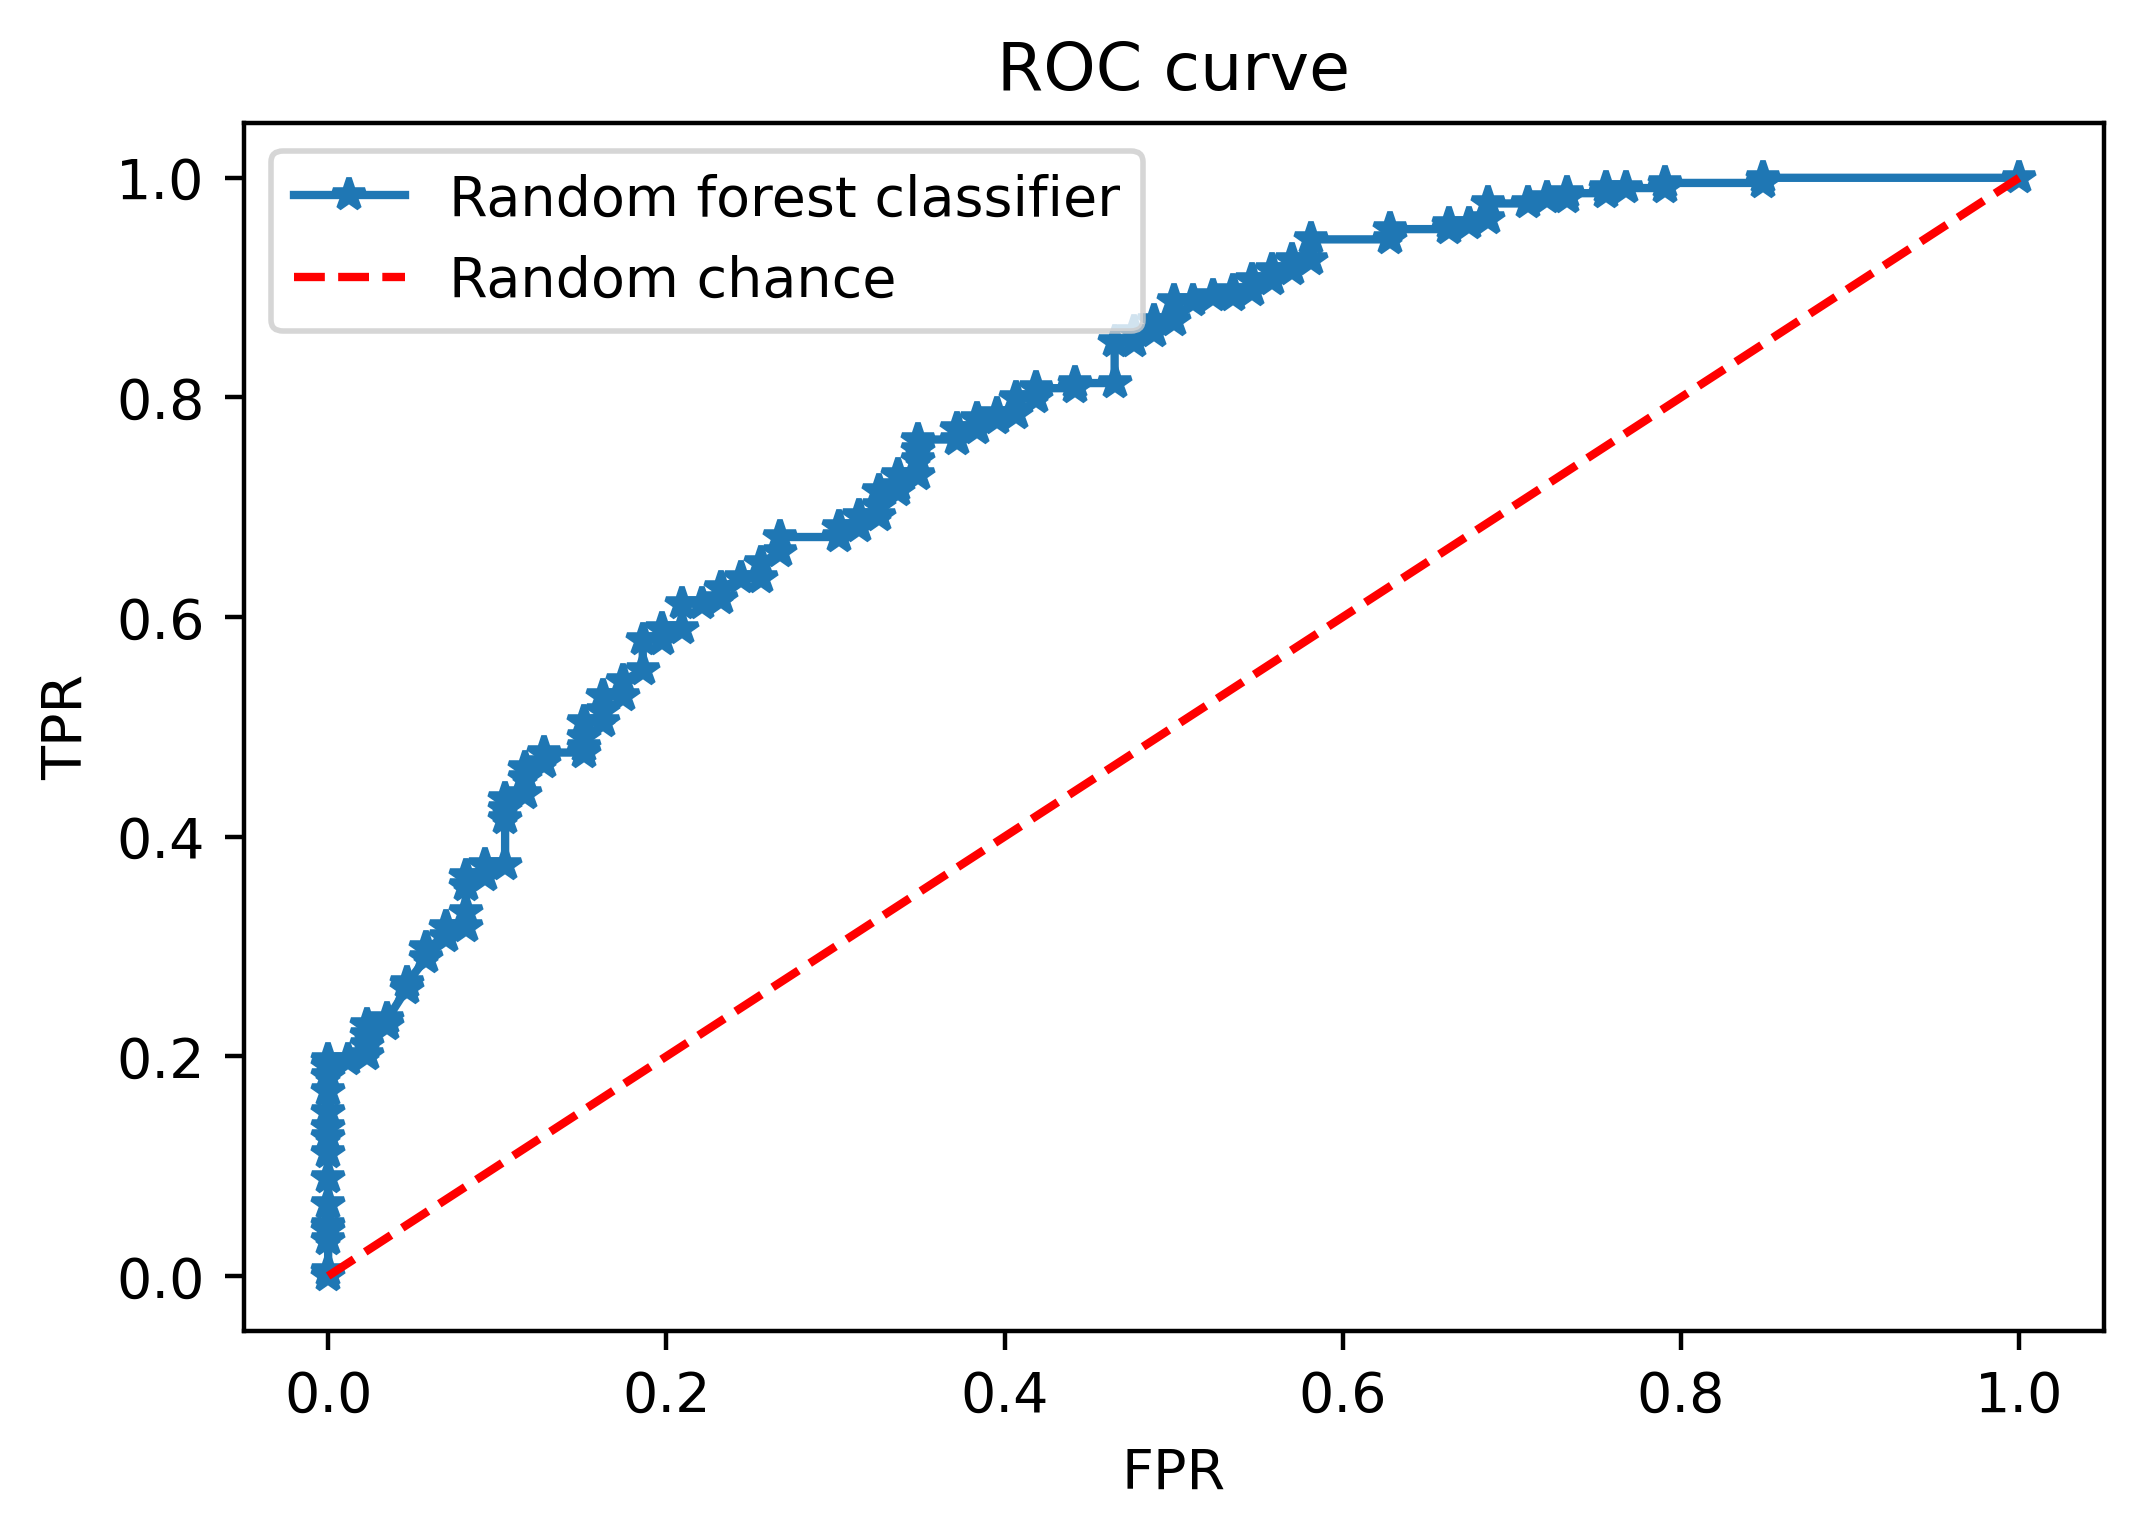

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0,1],[0,1], 'r--')
plt.legend(['Random forest classifier', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [26]:
preds = rf_model.predict(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, preds).ravel()

cost = fp*10 + fn*150

In [27]:
cost

2890

In [28]:
# Set a range for n_estimators from 10 to 40 in steps of 10
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2,5,8,10],
             'n_estimators':[10,20,30,40]}

# Optimize for a RandomForestClassifier() using GridSearchCV
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=3)
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector 

{'max_depth': 10, 'n_estimators': 30}

C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\psahai\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

Text(0, 0.5, 'Sensitivity(True Positive Rate)')

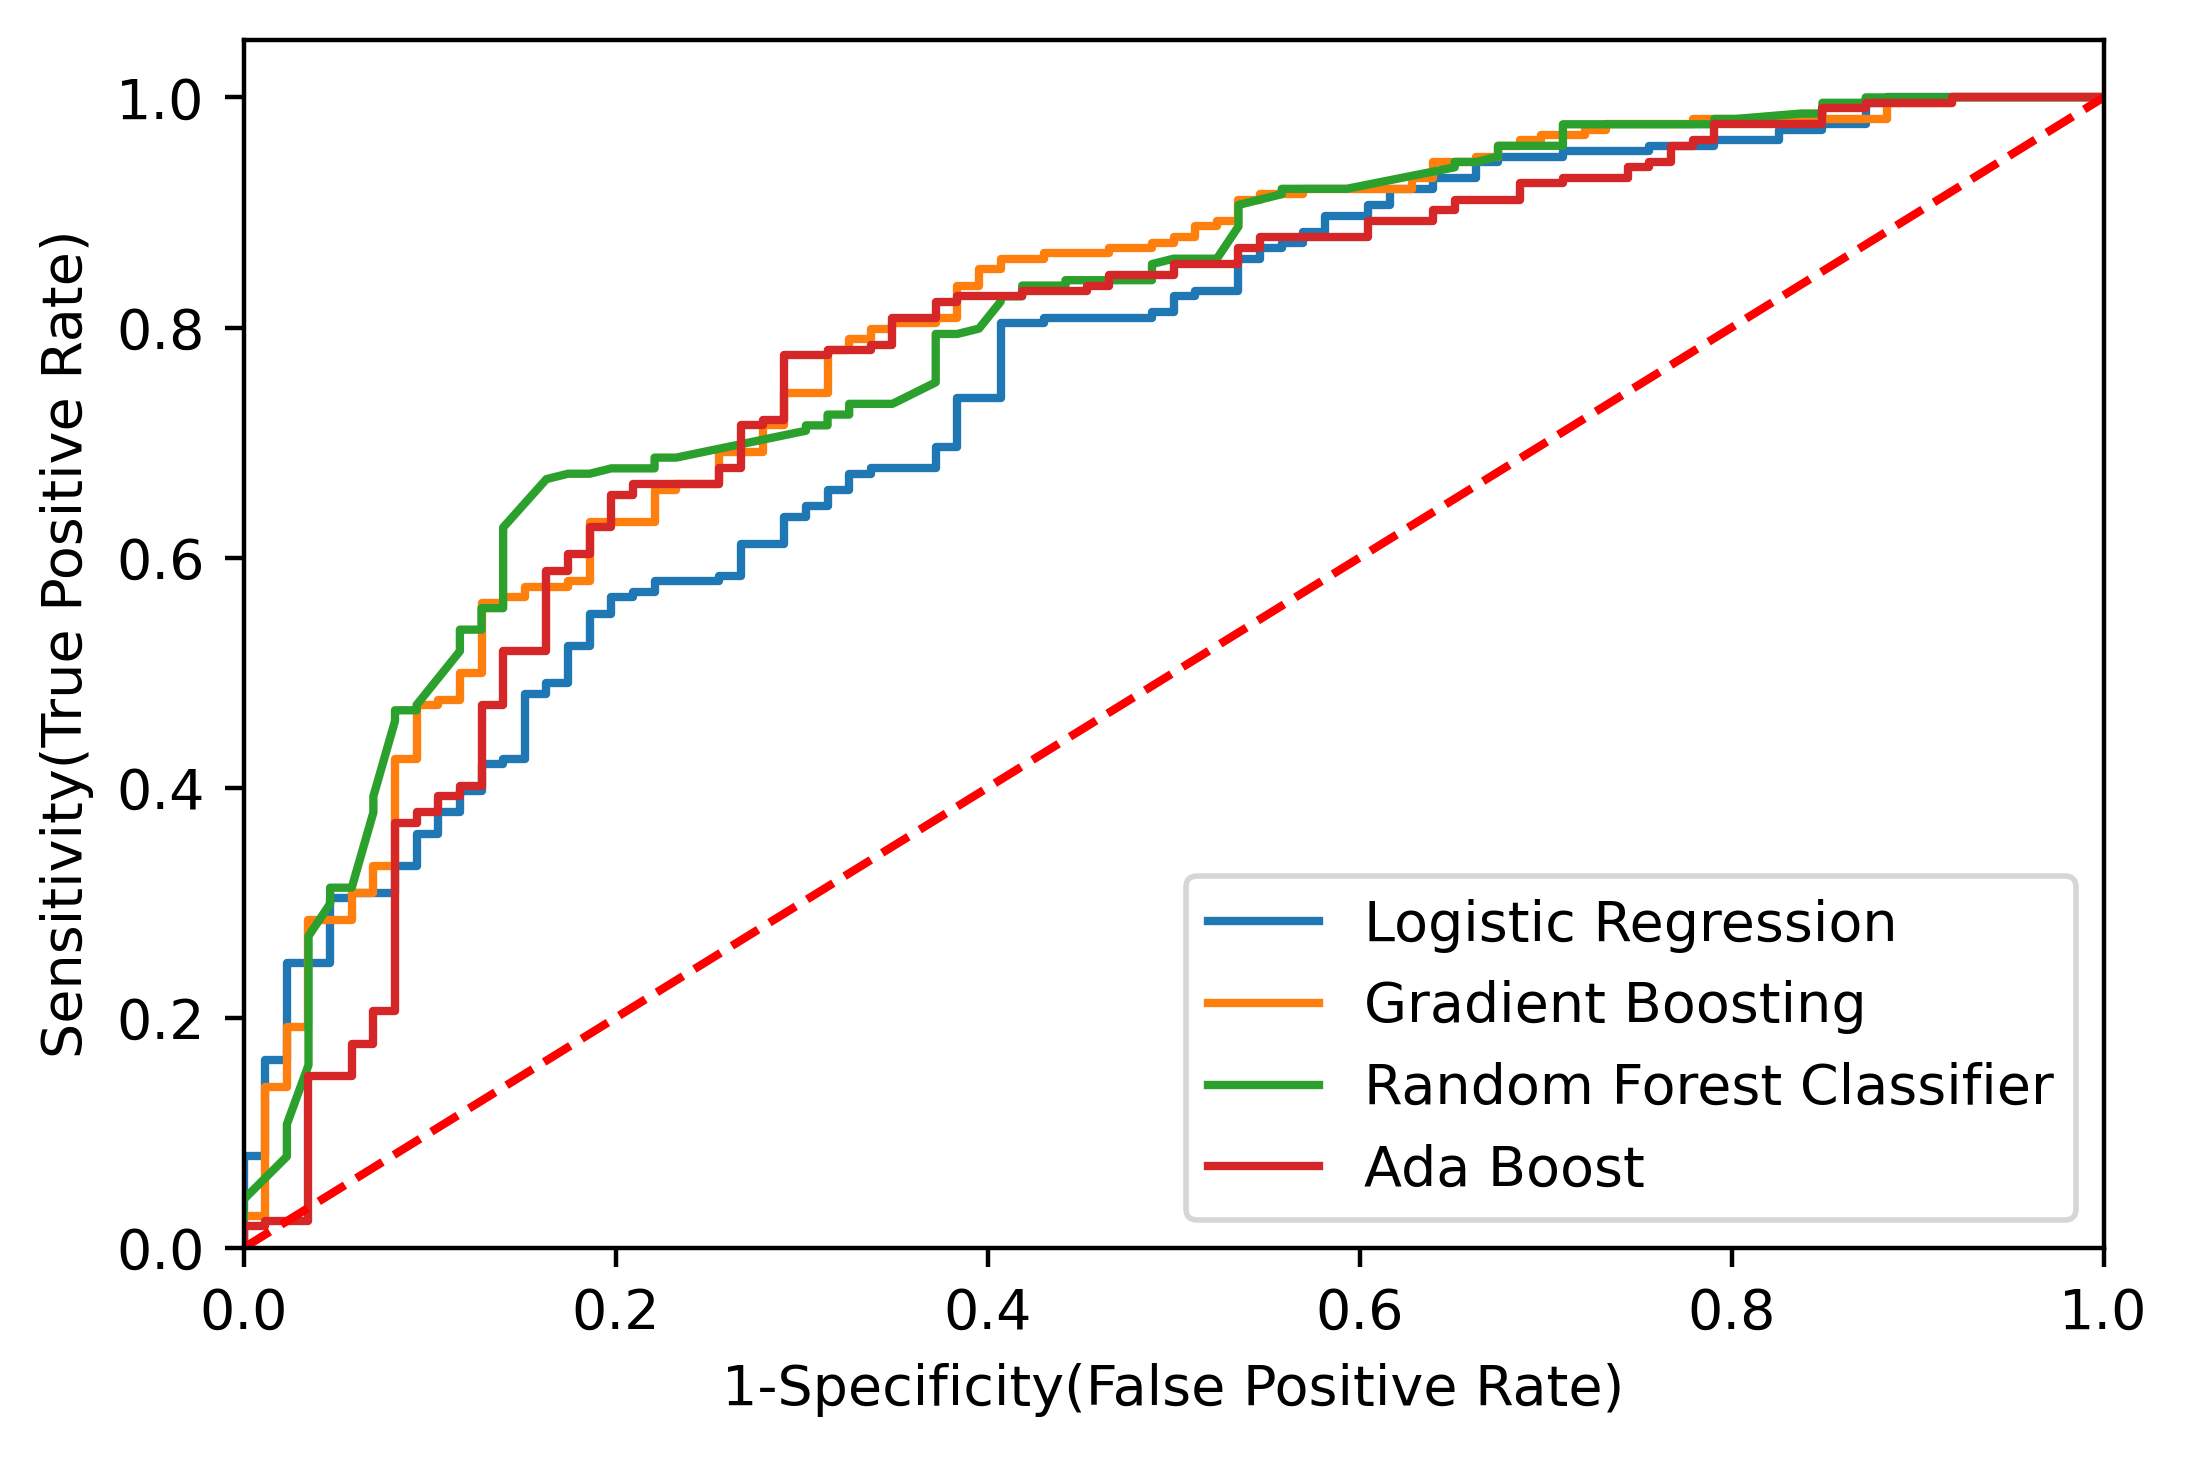

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

models = {'Logistic Regression': LogisticRegression(),
        'Gradient Boosting' : GradientBoostingClassifier(),
          'Random Forest Classifier': RandomForestClassifier(max_depth=15, n_estimators=30),
          'Ada Boost':AdaBoostClassifier(),
}
# Below for loop iterates through your models list
labels = list()
for l, m in models.items():
    model = m # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (l, auc))
    labels.append(l)
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(labels)
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')